# Bayesian Linear Regression

This lab is focused on Bayesian linear regression.  Our goal is to estimate a function $f(x) : \mathbb{R}\rightarrow\mathbb{R}$ given $N$ observations $\{(x_1,f(x_1)),\ldots, (x_N,f(x_N))\}$.

Assume an approximation $\tilde{f}(x)$ of the form
$$
\tilde{f}(x) = \sum_{p=0}^P m_p x^p.
$$
The regression problem is to characterize the coefficients $m=[m_0,\ldots,m_P]$, which we will do in a Bayesian setting.

### Goals:
By the end of this lab, you will be able to
- Derive the posterior distribution for linear-Gaussian problems.
- Characterize prior and posterior predictive distributions.

### Formulation:

Let $y$ denote the "observable" random variable denoting the models outputs and let $\bar{y}$ be a vector in $\mathbb{R}^N$ denoting the specific observations $f(x_1), \ldots, f(x_N)$.  Our goal is to characterize the distribution of $m$ given $y=\bar{y}$.  Bayes' rule gives
$$
p(m | y=\bar{y}) \propto p(y=\bar{y} | m) p(m).
$$
The two major components of this density are the prior density over the coefficeints $p(m)$ and the likelihood function $p(y|m)$.  The prior represents should contain any information we might have before obtaining the observation $\bar{y}$.  The likelihood function $p(y | m)$ defines a statistical model for the data.

For the prior distribution, we choose a Gaussian prior with a large variance.  In particular, 
$$
p(m) = N(0,\sigma_m^2 I),
$$ 
with $\sigma_m^2 = 100$.

> **Question:** Do you think this is a valid prior?  What if we knew $\frac{df}{dx}>0$?  What would change?


To form the likelihood function, we need to relate the expansion coefficients $m$ with the observable random variable $y$. To do this, consider the Vandermonde matrix 
$$
V = \left[\begin{array}{cccc}1 & x_1 & \ldots & x_1^P\\ \vdots & \vdots & & \vdots \\ 1 & x_N & \ldots & x_N^P \end{array}\right].
$$
Using $V$, a common choice is to assume $y$ is given by
$$
y = Vm + \epsilon,
$$
where $\epsilon \sim N(0,\Sigma_y)$ is a zero mean random variable with covariance $\Sigma_y$.  The additive error $\epsilon$ is often called the observation noise.  Here, we will further assume that $\Sigma_y = \sigma_y^2 I$.

> **Question:** Is this a reasonable model of $y$?  What if the noise was multiplicative?

With this additive error, the likelihood function takes the form
$$
p(y | m) = N(Vm, \Sigma).
$$

### Useful Identities
Let $\theta$ denote an arbitrary Gaussian random variable with mean $\mu_\theta$ and covariance $\Sigma_\theta$,
$$
\theta \sim N\left(\mu_\theta, \Sigma_\theta\right).
$$
Then, for a matrix $A$, 
$$
A\theta \sim N\left(A\mu_\theta,\, A\Sigma_\theta A^T\right)
$$
Let $\eta = A\theta + e$, where $e\sim N(0,\Sigma_e)$, then the posterior $p(\theta | \eta)$ is given by
$$
p(\theta | \eta=\bar{\eta}) = N\left(\hat{\mu}, \hat{\Sigma}\right),
$$
where 
$$
\hat{\mu} = \mu_\theta + \Sigma_\theta A^T\left(A\Sigma_\theta A^T + \Sigma_e\right)^{-1}\left(\bar{\eta} - A\mu_\theta\right)
$$
and
$$
\hat{\Sigma} = \Sigma_\theta - \Sigma_\theta A^T\left(A\Sigma_\theta A^T + \Sigma_e\right)^{-1}A\Sigma_\theta
$$

[These notes](https://cs.nyu.edu/~roweis/notes/gaussid.pdf) by Sam Roweis also provide some useful identities.

### Useful software references
- [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- [Numpy dot function](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dot.html)
- [Numpy Linear Solver]()

## Imports

In [1]:
import sys
sys.path.insert(0,'/home/fenics/Installations/MUQ_INSTALL/lib')

import numpy as np
import matplotlib.pyplot as plt

from PlotUtilities import PlotGaussianPDF


## Generate Synthetic Observations

In [2]:
def TrueFunc(x):
    return np.sin(4.5*x)

In [3]:
numObs = 20
trueNoiseStd = 3e-2
obsLocs = np.linspace(0,1,numObs)

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)

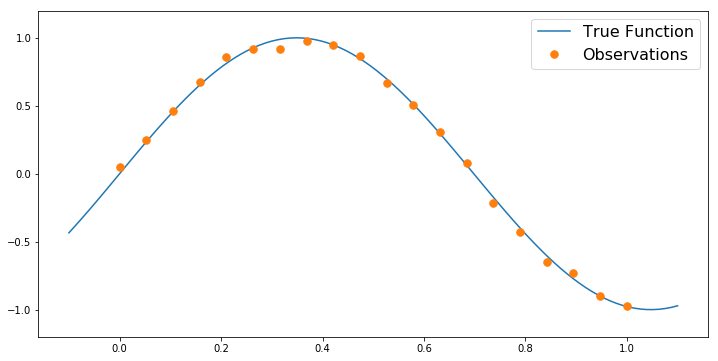

In [4]:
numPlot = 100

plotx = np.linspace(-0.1, 1.1, numPlot)

plt.figure(figsize=(12,6))
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend(fontsize=16)

## Form the prior

In [5]:
polyOrder = 4

priorMean = np.zeros(polyOrder+1)
priorCov = (10*10)*np.eye(polyOrder+1)

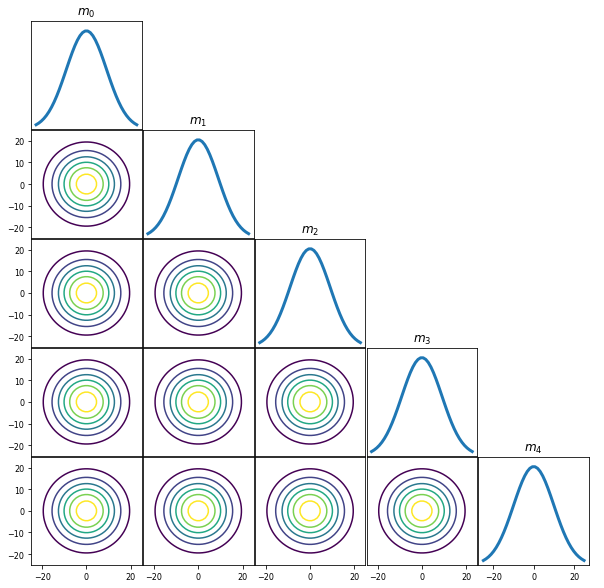

In [6]:
PlotGaussianPDF(priorMean,priorCov)

## Prior predictive

In [7]:
predV = np.ones((numPlot,polyOrder+1))
for p in range(1,polyOrder+1): 
    predV[:,p] = np.power(plotx, p)
    
predMean = np.dot(predV, priorMean)
predCov = np.dot(predV, np.dot(priorCov, predV.T))

predStd = np.sqrt(np.diag(predCov))

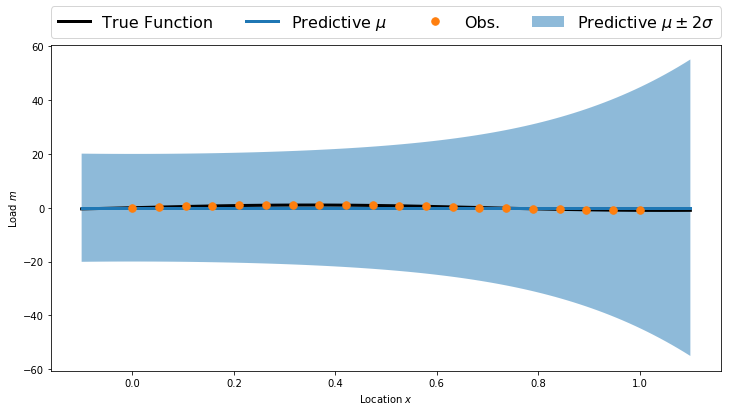

In [8]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Load $m$')
plt.show()

## Form the polynomial model

In [9]:
V = np.ones((numObs,polyOrder+1))
for p in range(1,polyOrder+1): 
    V[:,p] = np.power(obsLocs, p)

## Compute the posterior distribution

In [10]:
modelNoiseStd = 1.0*trueNoiseStd
noiseCov = modelNoiseStd * np.eye(numObs)

Vsigma = np.dot(V,priorCov)
predCov = np.dot(Vsigma, V.T) + noiseCov

postCov = priorCov - np.dot(Vsigma.T, np.linalg.solve(predCov, Vsigma))
postMean = priorMean + np.dot(Vsigma.T, np.linalg.solve(predCov, obsData))

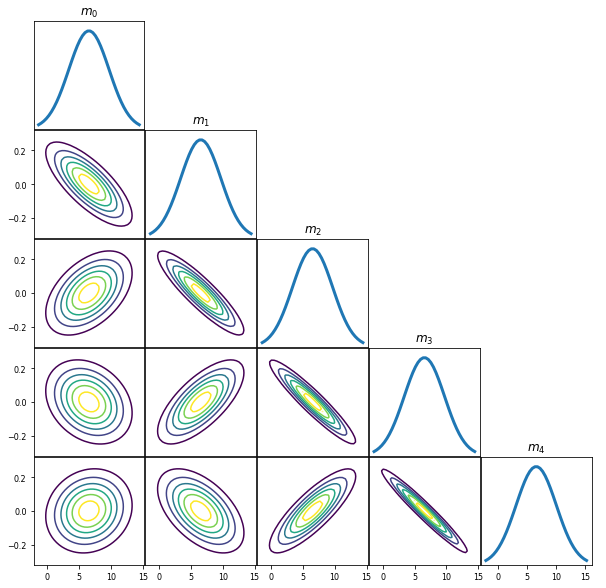

In [11]:
PlotGaussianPDF(postMean,postCov)

## Posterior Predictive

In [12]:
predMean = np.dot(predV, postMean)
predCov = np.dot(predV, np.dot(postCov, predV.T))

predStd = np.sqrt(np.diag(predCov))

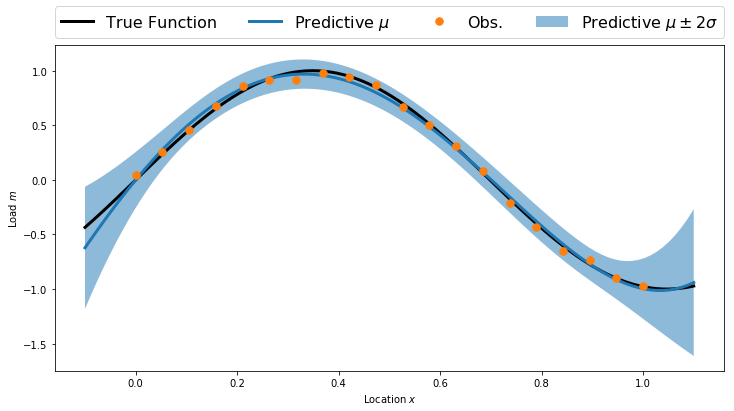

In [13]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Load $m$')
plt.show()

# Repeat with MUQ

In [14]:
import pymuqModeling as mm

#### Set up prior

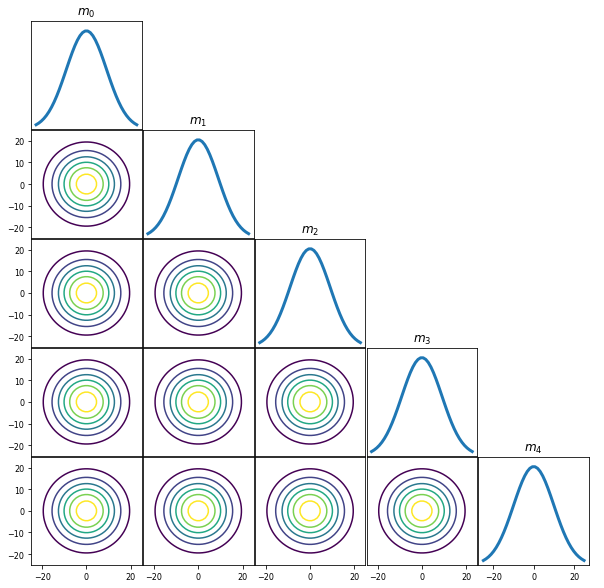

In [15]:
priorMean = np.zeros(polyOrder+1)
priorCov = (10*10)*np.eye(polyOrder+1)

prior = mm.Gaussian(priorMean, priorCov)
PlotGaussianPDF(prior.GetMean(), prior.GetCovariance())

#### Compute posterior

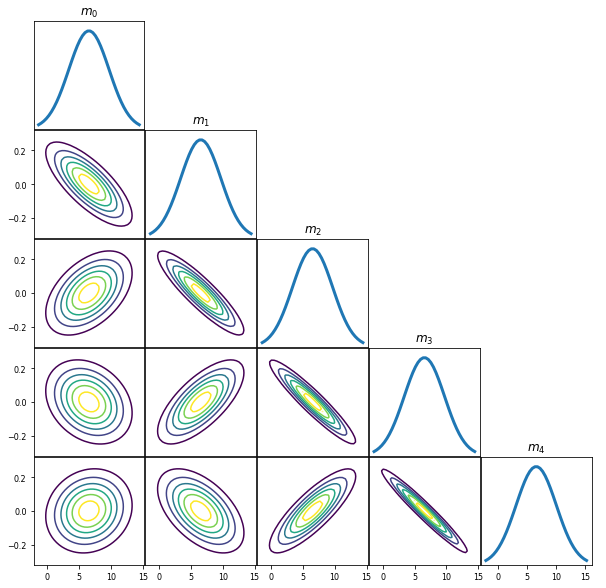

In [16]:
post = prior.Condition(V, obsData, noiseCov)

PlotGaussianPDF(post.GetMean(),post.GetCovariance())

## Prior Predictive Samples

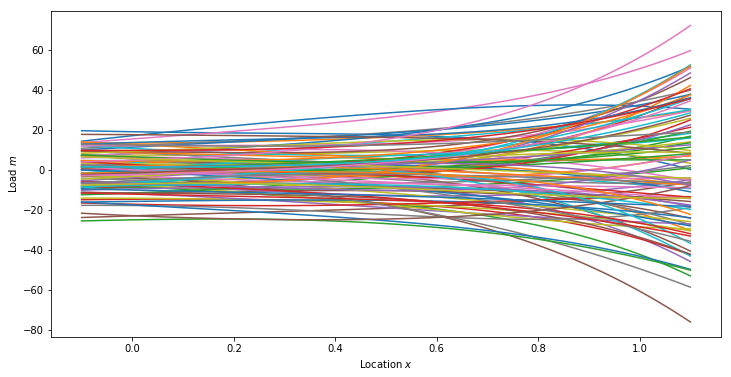

In [17]:
numSamps = 100

priorSamps = np.zeros((priorMean.shape[0], numSamps))
for i in range(numSamps):
    priorSamps[:,i] = prior.Sample()
    
priorPredSamps = np.dot(predV, priorSamps)

plt.figure(figsize=(12,6))
for i in range(numSamps):
    plt.plot(plotx, priorPredSamps[:,i])
    
plt.xlabel('Location $x$')
plt.ylabel('Load $m$')
plt.show()

## Posterior Predictive Samples

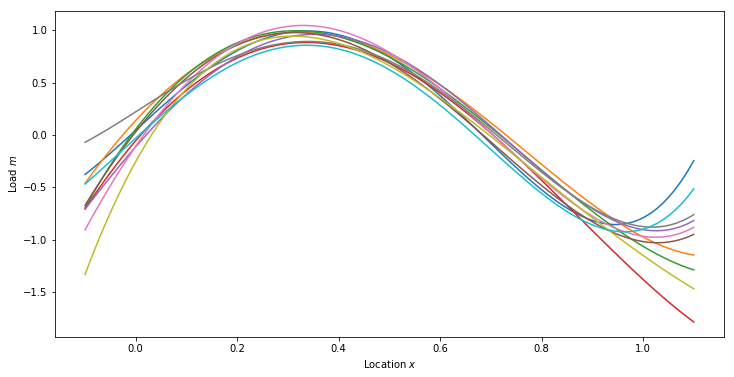

In [18]:
numSamps = 10

postSamps = np.zeros((priorMean.shape[0], numSamps))
for i in range(numSamps):
    postSamps[:,i] = post.Sample()

postPredSamps = np.dot(predV, postSamps)

plt.figure(figsize=(12,6))
for i in range(numSamps):
    plt.plot(plotx, postPredSamps[:,i])
    
plt.xlabel('Location $x$')
plt.ylabel('Load $m$')
plt.show()

## Redo with CBayes

In [19]:
from cbayes import sample as samp
from cbayes import distributions as dist
from cbayes import solve as solve


In [35]:
N = 100000
num_observations = numObs

In [36]:
dim_input = polyOrder+1
s_set = samp.sample_set((N, dim_input))
for i in range(dim_input):
    s_set.set_dist('norm', kwds={'loc': 0, 'scale': 10}, dim=i)
lam = s_set.generate_samples() # using an uniform prior is problematic for MC methods.

In [37]:
def model(lam):
    # we need this to return N by num_obs/num_timesteps
    return np.dot(V, lam.T).T

def MSE_generator(model, obs_data, sigma=None):   # this generates a sum of squared residuals.
    def QoI_fun(inputs): # that conforms to our desired model input
        M = len(obs_data)
        predictions = model(inputs)
        assert predictions.shape[1] == M
        residuals = predictions - obs_data
#         print(residuals.shape)
        if sigma is not None:
            QoI = (1./M)*np.sum( (residuals/sigma)**2, axis=1 )   # MSE
        else:
            QoI = (1./M)*np.sum( (residuals/obs_data)**2, axis=1 )  # MRSE
        return QoI
    return QoI_fun

PtO_fun = MSE_generator(model, obsData, trueNoiseStd)

In [38]:
# let's start with the posterior from the deterministic approach as our prior.
for i in range(N):
    s_set.samples[i,:] = post.Sample()

In [39]:
p_set = samp.map_samples_and_create_problem(s_set, PtO_fun)
lam = s_set.samples
# np.min(p_set.output.samples)

0.088362896663689641

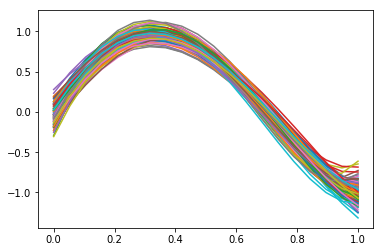

In [40]:
yy = model(lam)
for i in range(100):
    plt.plot(obsLocs, yy[i])
np.std(yy-obsData)

In [41]:
p_set.compute_pushforward_dist()
pf_dist = p_set.pushforward_dist
p_set.set_observed_dist('gamma', {'a':num_observations/2, 'scale':2/num_observations}, dim=0)

In [42]:
p_set.set_ratio()

In [43]:
s_set.seed = 1
solve.problem(p_set)

In [44]:
accepted_inputs = p_set.input.samples[p_set.accept_inds,:]
len(accepted_inputs)

92

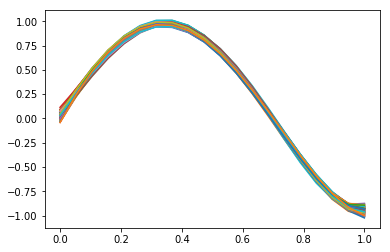

In [45]:
yy = model(accepted_inputs)
for i in range(len(yy)):
    plt.plot(obsLocs, yy[i])

In [46]:
np.std(yy-obsData), trueNoiseStd

(0.035126931086796619, 0.03)